In [1]:
import pandas as pd # Reading csv file 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
%matplotlib inline

In [2]:
### read data
NA_Forest = gpd.read_file('E:\\vegetation\\gee\\notebook\\NA_Forests\\NA_Forests_1to10mill2.shp') # North American Forest
boundary = gpd.read_file('E:\\vegetation\\gee\\notebook\\NA_boudary\\USA_CAN_Mex.shp') #USA and Canada Mex Boundary
Canada_LAI= pd.read_csv('E:\\vegetation\\gee\\notebook\\csv\\In-situLAI_Canada_2017_2019_location.csv') #Canda LAI
NEON_Site= pd.read_csv('E:\\vegetation\\gee\\notebook\\NA_boudary\\NEON_Field_Site_selected .csv') #Canda LAI

In [3]:
###data preparation
NA_Forest=NA_Forest.to_crs(epsg=4326)
boundary=boundary.to_crs(epsg=4326)
#vaidate geometry of polygons 
boundary['geometry'] = boundary.buffer(0)
NA_Forest['geometry']=NA_Forest.buffer(0)

NA_Forest_clipped=gpd.clip(NA_Forest,boundary)
NA_Forest_selected=NA_Forest_clipped.loc[~NA_Forest_clipped['EZMAP_CODE'].isin(['24', '25', '22']), :]

# creating a geometry column 
CanadaLAI_geometry = [Point(xy) for xy in zip(Canada_LAI['LONG'], Canada_LAI['LAT'])]
NEON_Site_geometry = [Point(xy) for xy in zip(NEON_Site['field_longitude'], NEON_Site['field_latitude'])]

# Creating a Geographic data frame 
CanadaLAI_gdf = gpd.GeoDataFrame(Canada_LAI, crs='epsg:4326', geometry=CanadaLAI_geometry)
NEON_Site_gdf = gpd.GeoDataFrame(NEON_Site, crs='epsg:4326', geometry=NEON_Site_geometry)


C:\Users\gahong\.conda\envs\eeALR\lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


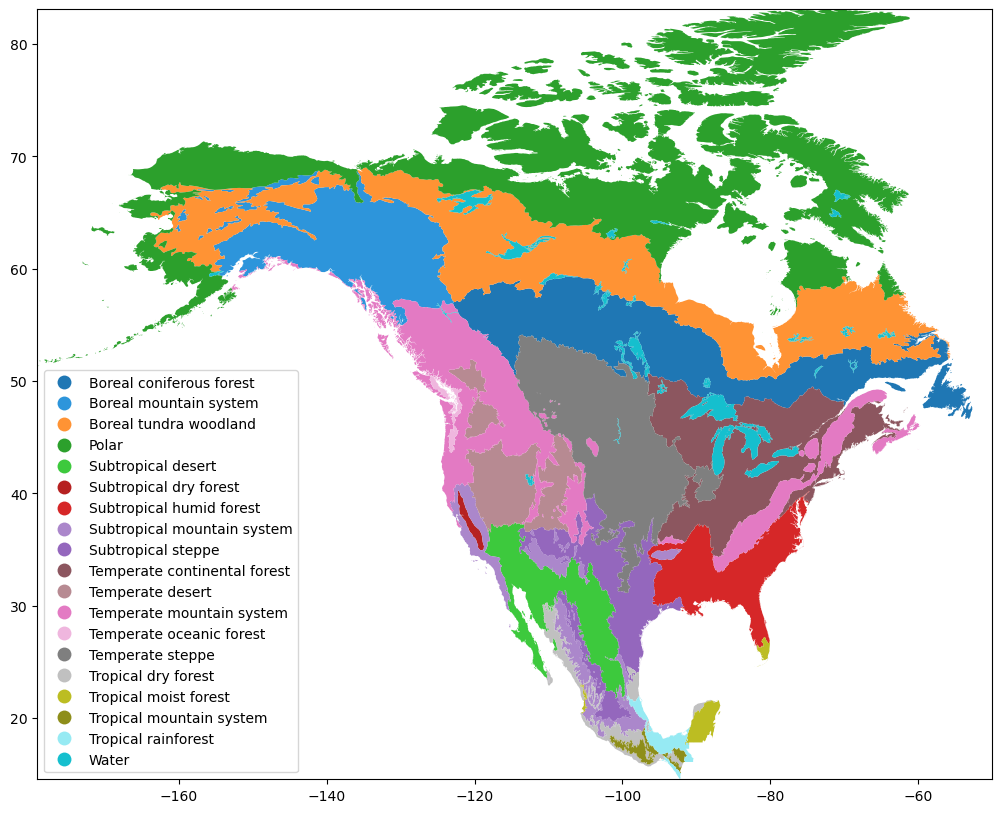

In [4]:
NA_Forest_clipped.sort_values(by=['EZMAP_ZONE'], inplace=True)

### adjust original legend color
col_pal={ 'Tropical mountain system' : '#%02x%02x%02x' % (142, 142,26),
'Subtropical desert': '#%02x%02x%02x' % (61, 201,61),
'Subtropical mountain system' : '#%02x%02x%02x' % (171, 135,203),
'Subtropical dry forest' : '#%02x%02x%02x' % (182, 33,33),
'Temperate desert': '#%02x%02x%02x' % (183, 138,146), 
'Temperate oceanic forest': '#%02x%02x%02x' % (239, 182,222), 
'Temperate mountain system' : '#%02x%02x%02x' % (227, 122,195), 
'Water': '#%02x%02x%02x' % (21, 191,206),
'Boreal tundra woodland' : '#%02x%02x%02x' % (255, 147,52), 
'Boreal mountain system' : '#%02x%02x%02x' % (45, 149,219), 
'Tropical rainforest':'#%02x%02x%02x' % (150, 234,243), 
'Tropical moist forest' : '#%02x%02x%02x' % (188, 189,34),
'Tropical dry forest': '#%02x%02x%02x' % (192, 192,192),
'Subtropical steppe': '#%02x%02x%02x' % (148, 103,189), 
'Subtropical humid forest': '#%02x%02x%02x' % (214, 39,40), 
'Temperate continental forest' : '#%02x%02x%02x' % (140, 86,95), 
'Temperate steppe' : '#%02x%02x%02x' % (127, 127,127), 
'Boreal coniferous forest': '#%02x%02x%02x' % (31, 119,180), 
'Polar' :  '#%02x%02x%02x' % (44, 160,44) } 

ezmap = mcolors.ListedColormap([col_pal[z] for z in NA_Forest_clipped['EZMAP_ZONE'].unique()])

###plot data
fig0, ax0 = plt.subplots(figsize = (15,10))

xlim = ([boundary.total_bounds[0],  -50])
ylim = ([boundary.total_bounds[1],  boundary.total_bounds[3]])

ax0.set_xlim(xlim)
ax0.set_ylim(ylim)
base0=NA_Forest_clipped.plot(column='EZMAP_ZONE', cmap=ezmap,legend=True,legend_kwds={'loc': 'lower left'},ax=ax0) 
fig0.savefig('Figure1_neon_legend.png',dpi=600)

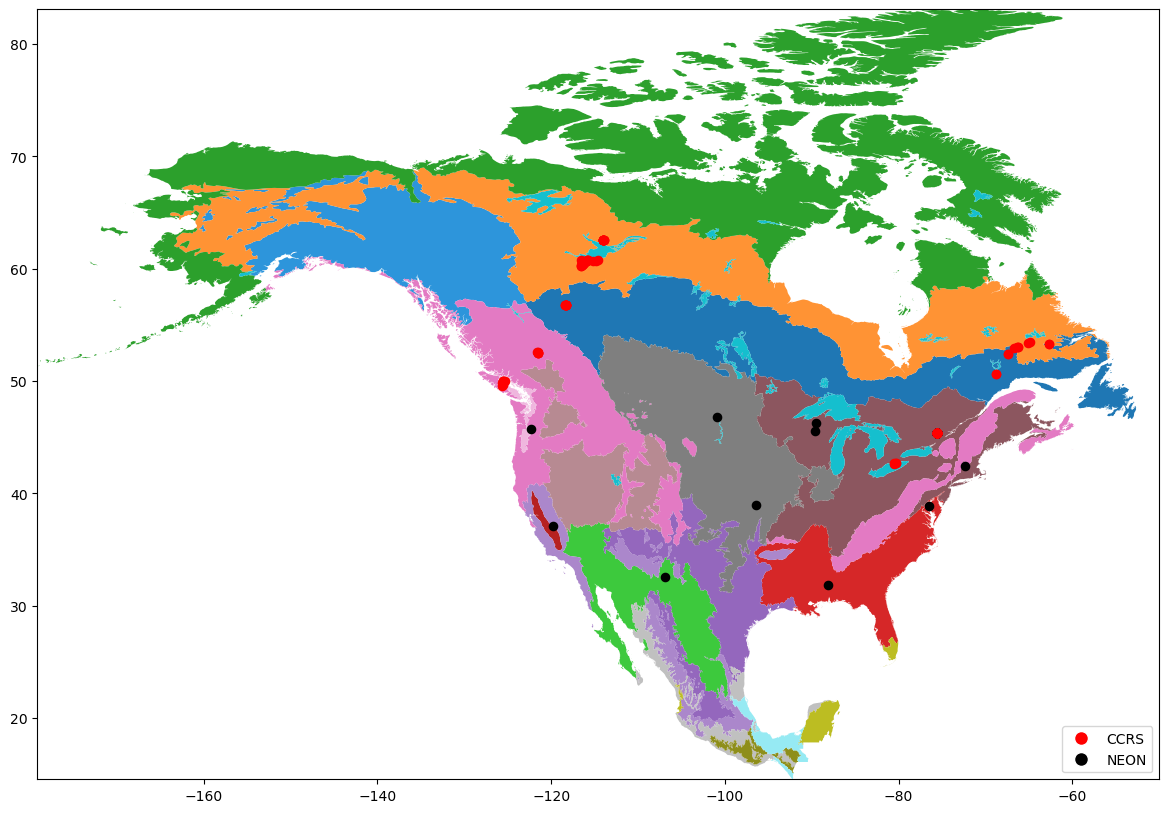

In [5]:
##another plot
fig1, ax1 = plt.subplots(figsize = (15,10))
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
base1=NA_Forest_clipped.plot(column='EZMAP_ZONE', cmap=ezmap,legend=True,legend_kwds={'loc': 'lower left'},ax=ax1) 

CanadaLAI_gdf.plot(ax=base1, marker='o', color='red', markersize=35);#, label='Canada_LAI');

NEON_Site_gdf.plot(ax=base1, marker='o', color='black', markersize=35);#, label='USA_LAI');

legend_elements = [ Line2D([0], [0], marker='o', color='w', markersize=10, label='CCRS',markerfacecolor='red'),
                   Line2D([0], [0], marker='o', color='w', markersize=10, label='NEON',markerfacecolor='black')]
leg=ax1.legend(handles=legend_elements, loc="lower right");#,facecolor='lightgrey', framealpha=1)
fig1.savefig('Figure1_neon.png',dpi=600)